In [8]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
import xgboost as xgb
from utils import preprocess_data, evaluation
from matplotlib import pyplot as plt

In [9]:
data_csv = pd.read_csv('com_E_work_and_week_all.csv')
dataset = data_csv.values
dataset

array([[143., 138., 177., ..., 188.,  85.,  59.],
       [194., 198., 200., ..., 182.,  93.,  60.],
       [182., 196., 253., ..., 171.,  69.,  59.],
       ...,
       [185., 165., 216., ..., 196.,  89.,  62.],
       [173., 188., 252., ..., 210.,  89.,  59.],
       [177., 172., 230., ..., 206.,  92.,  53.]])

In [10]:
TF = dataset[:, 1].reshape(-1, 1)  #col vector

# Normalization
Normalization = preprocessing.MinMaxScaler()
Norm_TF = Normalization.fit_transform(TF)

trainX, trainY, testX, testY = preprocess_data(data=Norm_TF, rate=0.8, seq_len=12, pre_len=3)
trainX, trainY = np.array(trainX).squeeze(), np.array(trainY).squeeze()[:, -1]
testX, testY = np.array(testX).squeeze(), np.array(testY).squeeze()[:, -1]

####基准模型选择：
#     1.线性回归：LR;     2.多层感知机回归：MPL；   3.决策树回归：DT；          4.支持向量机回归：SVR;
#     5.K近邻回归:KNN;    6.随机森林回归:RF;        7.Adaboost回归:AdaBoost;    8.XGB回归:XGB;
#     9.GBRT回归:GBRT;    10.Bagging回归:BR;        11.极端随机树回归:ETR

method = 'XGB'

In [11]:
# 预测
if method == 'LR':                                           # 线性回归
      LR = LinearRegression()
      Norm_pred = LR.fit(trainX, trainY).predict(testX)
elif method == 'MPL':                                         # MPL回归
      MLP = MLPRegressor(hidden_layer_sizes=(50,), activation='relu',
                         solver='adam', alpha=1e-04,
                         learning_rate_init=0.001, max_iter=1000)
      Norm_pred = MLP.fit(trainX, trainY).predict(testX)
elif method == 'DT':                                         # 决策树回归
      DT = DecisionTreeRegressor()
      Norm_pred = DT.fit(trainX, trainY).predict(testX)
elif method == 'SVR':                                        # 支持向量机回归
      SVR_MODEL = svm.SVR()
      Norm_pred = SVR_MODEL.fit(trainX, trainY).predict(testX)
elif method == 'KNN':                                         # K近邻回归
      KNN = KNeighborsRegressor()
      Norm_pred = KNN.fit(trainX, trainY).predict(testX)
elif method == 'RF':                                          # 随机森林回归
      RF = RandomForestRegressor(n_estimators=1000)
      Norm_pred = RF.fit(trainX, trainY).predict(testX)
elif method == 'AdaBoost':                                    # Adaboost回归
      AdaBoost = AdaBoostRegressor(n_estimators=50)
      Norm_pred = AdaBoost.fit(trainX, trainY).predict(testX)
elif method == 'XGB':                                           # XGB回归
      XGB_params = {'learning_rate': 0.1, 'n_estimators': 50,
                    'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'objective': 'reg:squarederror', 'subsample': 0.8,
                    'colsample_bytree': 0.8, 'gamma': 0,
                    'reg_alpha': 0.1, 'reg_lambda': 0.1}
      XGB = xgb.XGBRegressor(**XGB_params)
      Norm_pred = XGB.fit(trainX, trainY).predict(testX)
elif method == 'GBRT':                                          # GBRT回归
      GBRT = GradientBoostingRegressor(n_estimators=100)
      Norm_pred = GBRT.fit(trainX, trainY).predict(testX)
elif method == 'BR':                                            # Bagging回归
      BR = BaggingRegressor()
      Norm_pred = BR.fit(trainX, trainY).predict(testX)
elif method == 'ETR':                                           # ExtraTree极端随机树回归
      ETR = ExtraTreeRegressor()
      Norm_pred = ETR.fit(trainX, trainY).predict(testX)

In [12]:
# 反归一
sim_p = Normalization.inverse_transform(Norm_pred[:, np.newaxis])
real_p = Normalization.inverse_transform(testY[:, np.newaxis])

In [13]:
# 误差指标
MAE, RMSE, MAPE, R2 = evaluation(real_p, sim_p)
Results=[MAE, RMSE, MAPE, R2]
print('\n ', "method:", method,
      '\n ', "MAE:", MAE,
      '\n ', "RMSE:", RMSE,
      '\n ', "MAPE:", MAPE,
      '\n ', "R2:", R2)


  method: XGB 
  MAE: 18.68963392028198 
  RMSE: 24.939966566671263 
  MAPE: 12.169118937444692 
  R2: 0.9132474147788501


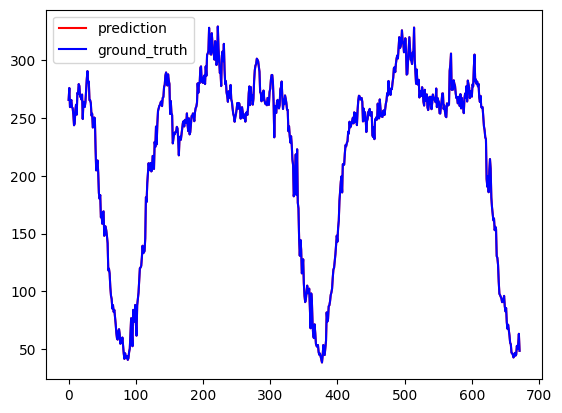

In [14]:
plt.plot(sim_p[24*0*4:24*7*4], 'r', label='prediction')
plt.plot(sim_p[24*0*4:24*7*4], 'b', label='ground_truth')
plt.legend(loc='best')
plt.show()